In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [2]:
plt.style.use("fivethirtyeight")

In [3]:
from sklearn.decomposition import PCA

Data is a small sample of data collected from the 1000 Genomes Project. http://www.1000genomes.org/

In [4]:
data = pd.read_csv("p4dataset2017.txt", delimiter=" ", header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,10094,10095,10096,10097,10098,10099,10100,10101,10102,10103
0,HG01879,1,ACB,G,G,T,T,A,A,C,...,T,A,T,A,A,T,T,T,G,A
1,HG01880,2,ACB,A,A,T,T,A,G,C,...,G,C,T,G,A,T,C,T,G,G
2,HG01881,2,ACB,A,A,T,T,A,A,G,...,G,C,T,G,A,T,C,T,G,G
3,HG01882,1,ACB,A,A,T,C,A,A,G,...,G,A,T,G,A,T,C,T,G,G
4,HG01883,2,ACB,G,A,T,C,G,A,C,...,G,C,T,G,A,T,C,T,G,G


First column of data is individual, second column is sex (1 = male, 2 = female), 3rd is population.

Encodings for the populations:
ACB: African Caribbeans in Barbados
GWD: Gambian in Western Divisions
ESN: Esan in Nigeria
MSL: Mende in Sierra Leone
YRI: Yoruba in Ibadan, Nigeria
LWK: Luhya in Webuye, Kenya
ASW: Americans of African Ancestry in Southwest US

In [10]:
data[2].unique() #unique populations for dataset

array(['ACB', 'GWD', 'ESN', 'MSL', 'YRI', 'LWK', 'ASW'], dtype=object)

In [11]:
data.shape #995 individuals, 10101 nucleotide columns

(995, 10104)

In [5]:
from scipy.stats import mode

Find the most common nucleobase in each column of nucleobases.

In [6]:
dnaModes = data.iloc[:, 3:].mode(axis = 0).values[0] #most common nucleotide by location

Use dnaModes vector to convert genetic data into a binary matrix where each entry is 0 if the column for that individual has the mode nucleobase and equal to 1 if it is not the mode nucleobase.

In [30]:
#data.columns = [str(i) for i in range(data.shape[1])]

In [7]:
X = data.iloc[:, 3:] #only nucleobase data

In [160]:
X.head()

,3,4,5,6,7,8,9,10,11,12,...,10094,10095,10096,10097,10098,10099,10100,10101,10102,10103
0,G,G,T,T,A,A,C,A,C,C,...,T,A,T,A,A,T,T,T,G,A
1,A,A,T,T,A,G,C,A,T,T,...,G,C,T,G,A,T,C,T,G,G
2,A,A,T,T,A,A,G,A,C,C,...,G,C,T,G,A,T,C,T,G,G
3,A,A,T,C,A,A,G,A,C,C,...,G,A,T,G,A,T,C,T,G,G
4,G,A,T,C,G,A,C,A,C,C,...,G,C,T,G,A,T,C,T,G,G


Convert string nucleobase data to binary data. If data is not equal to the column mode it is set to 1 and 0 otherwise.

In [8]:
Xnum = X != dnaModes

In [9]:
Xnum = Xnum.astype(int) #convert Boolean True False to 0/1
Xnum.head()

,3,4,5,6,7,8,9,10,11,12,...,10094,10095,10096,10097,10098,10099,10100,10101,10102,10103
0,0,1,0,1,0,1,1,0,0,0,...,0,1,1,1,0,0,1,0,0,1
1,1,0,0,1,0,0,1,0,1,1,...,1,0,1,0,0,0,0,0,0,0
2,1,0,0,1,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,0,0,...,1,1,1,0,0,0,0,0,0,0
4,0,0,0,0,1,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0


In [10]:
dnaPCA = PCA(n_components=3)
dnaPCA.fit(Xnum)

PCA(copy=True, n_components=3, whiten=False)

Fit PCA with 3 principal components.

In [11]:
dnaPCA.explained_variance_ratio_

array([ 0.00569445,  0.00463994,  0.00373793], dtype=float32)

In [12]:
dnaRecover = dnaPCA.transform(Xnum)

Plot of first 2 principal components.  There appears to be some separation between the 7 populations based upon the visualization although there is overlap. The clusters roughly show geographic separation based upon location of the populations within Africa.

C:\Users\Steve\Anaconda2\envs\dato-env\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


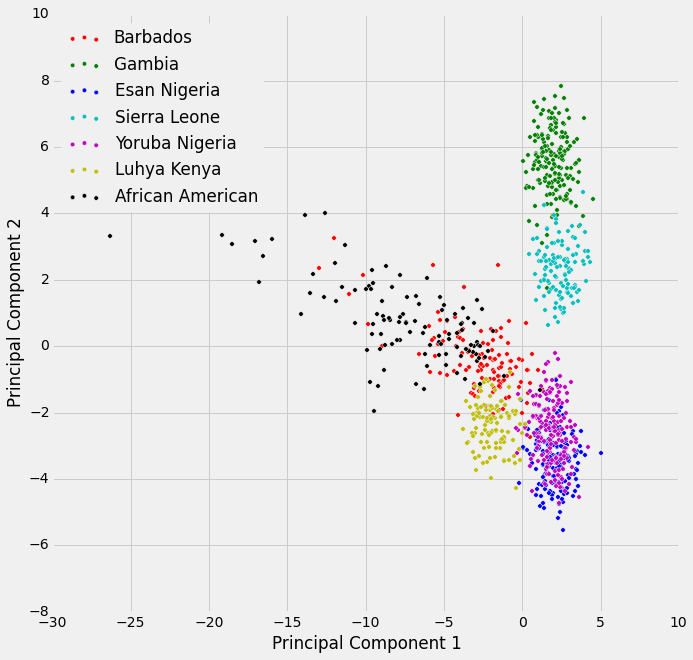

In [13]:
labels = ['Barbados', 'Gambia', 'Esan Nigeria', 'Sierra Leone', 'Yoruba Nigeria', 'Luhya Kenya', 'African American']
populations = ['ACB', 'GWD', 'ESN', 'MSL', 'YRI', 'LWK', 'ASW']
colors = ["r", "g", "b", "c", "m", "y", "k"]
index_list = []
for pop in populations:
    index_list.append(data[2] == pop)
plt.figure(figsize=(10, 10))
#Plot populations and give individual labels and colors
for i in range(len(index_list)):
    plt.scatter(dnaRecover[index_list[i], 0], dnaRecover[index_list[i], 1], label = labels[i], c=colors[i]);
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(loc = "upper left")

This plot below shows the first principal component versus the third.  

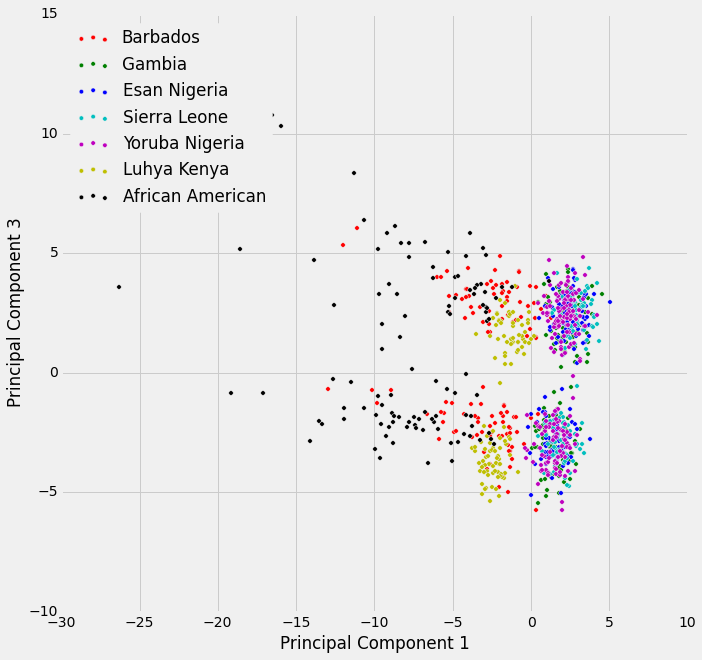

In [14]:
plt.figure(figsize=(10, 10))
#Plot populations and give individual labels and colors
for i in range(len(index_list)):
    plt.scatter(dnaRecover[index_list[i], 0], dnaRecover[index_list[i], 2], label = labels[i], c=colors[i]);
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 3")
plt.legend(loc = "upper left")

In [35]:
X = np.arange(0.001, 1.001, 0.001)
Y = 2 * X

The pca_recover function takes a vector X and a vector Y and returns the slope of the first principal component found by PCA.

In [48]:
def pca_recover(X, Y):
    data = np.column_stack((X, Y))
    pca1 = PCA(n_components = 1)
    pc1 = pca1.fit_transform(data)
    component = pca1.components_
    return component[0][1] / component[0][0]

In [49]:
pca_recover(X, Y)

1.9999999999999991

The function ls_recover calculates regression coefficient given an independent variable vector X and a corresponding dependent variable Y. 

In [31]:
def ls_recover(X, Y):
    X_bar = np.mean(X)
    Y_bar = np.mean(Y)
    X_normal = X - X_bar
    Y_normal = Y - Y_bar
    X_l2 = sum(np.power(X_normal, 2))
    return np.dot(X_normal, Y_normal) / X_l2

In [32]:
ls_recover(X, Y)

2.0000000000000009

Both PCA and linear regression return the same coefficient 2 when the data is linear without random noise.

Now let both X and Y be uniformly distributed in the square [0, 1] X [0, 1]

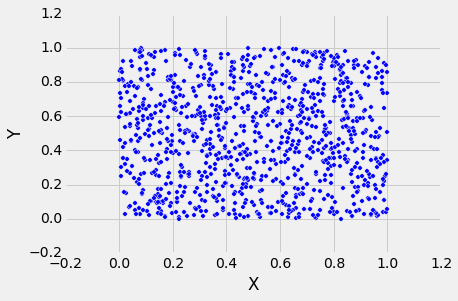

In [56]:
X = np.random.uniform(size=1000)
Y = np.random.uniform(size=1000)
plt.scatter(X, Y);
plt.xlabel("X")
plt.ylabel("Y")

In [57]:
ls_recover(X, Y)

-0.0013009401285954715

In [59]:
pca_recover(X, Y)

-13.565138484391552

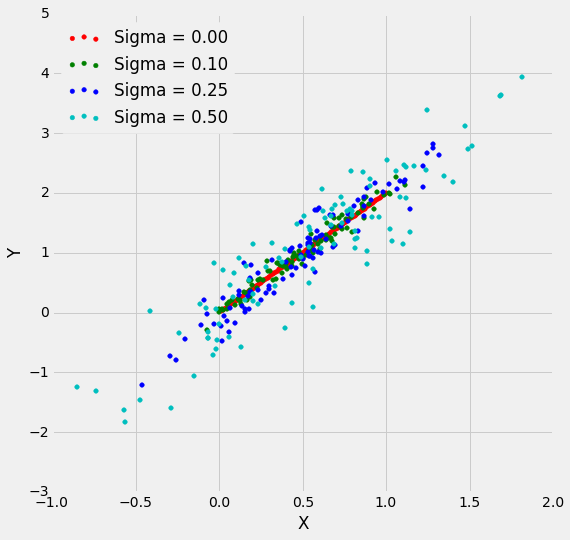

In [69]:
sigs = [0.0, 0.10, 0.25, 0.50]
colors = ["r", "g", "b", "c"]
plt.figure(figsize=(8, 8))
for i in range(len(sigs)):
    X = np.arange(0.01, 1.01, 0.01) + np.random.normal(0.0, sigs[i], 100)
    Y = 2 * X + np.random.normal(0.0, sigs[i], size=len(X))
    plt.scatter(X, Y, color=colors[i], label="Sigma = %0.2f" %sigs[i]);
plt.xlabel("X")
plt.ylabel("Y")
plt.legend(loc="upper left")

Now consider the case where x is an independent (explanatory) variable and noisy measurements are obtained of y. X is fixed as 0.001 to 1.000 in increments of 0.001. Y is 2*X + normally distributed noise with mean 0 and variance c where c is from 0.00 to 0.50 in increments of 0.05.

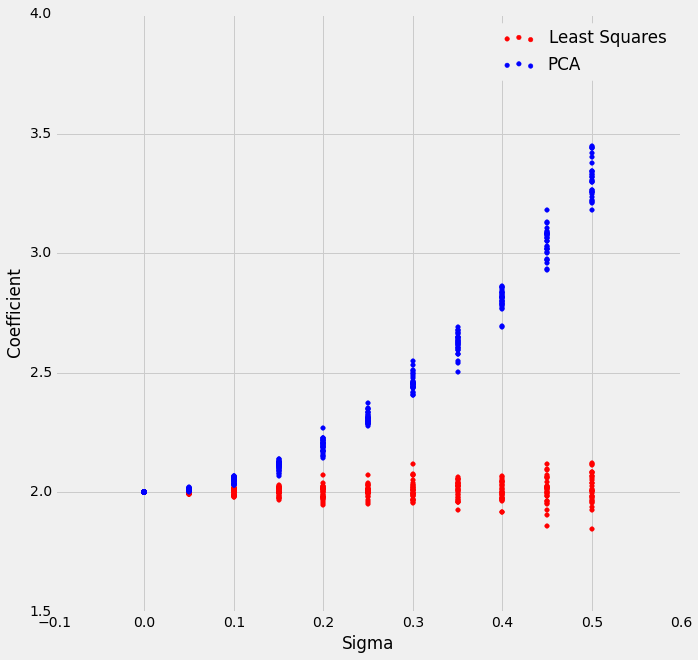

In [65]:
sigmas = np.arange(0.00, 0.55, 0.05)
X = np.arange(0.001, 1.001, 0.001)
trials = 30
plt.figure(figsize=(10, 10))
for sig in sigmas:
    ls_trials = []
    pca_trials = []
    for t in range(trials):
        Y = 2*X + np.random.normal(loc=0.0, scale=sig, size=len(X))
        ls_trials.append(ls_recover(X, Y))
        pca_trials.append(pca_recover(X, Y))
    if sig == 0.00:
        plt.scatter([sig]*30, ls_trials, label="Least Squares", color="r");
        plt.scatter([sig]*30, pca_trials, label="PCA", color="b");
    else:
        plt.scatter([sig]*30, ls_trials, color="r");
        plt.scatter([sig]*30, pca_trials, color="b");
plt.xlabel("Sigma")
plt.ylabel("Coefficient")
plt.legend(loc="best")

Even as the variance of the noise added to Y increases linear regression still performs well with very little variation in the calculated coefficient. Least squares is more useful when an independent variable is designated and the dependent variable is a linear combination of the known independent variables and noise. PCA does not designate or distinguish between the X and Y designated here as dependent and independent variables.  

Now a simulation where both X and Y have random noise.

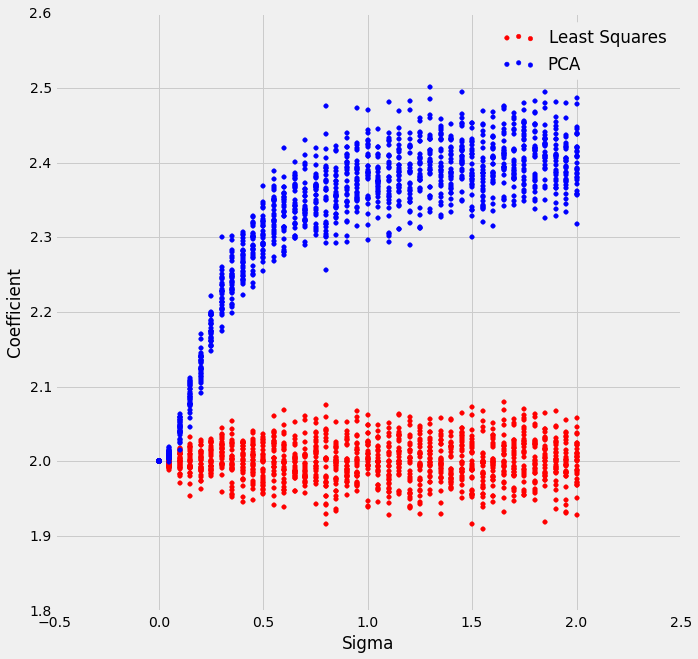

In [72]:
sigmas = np.arange(0.00, 2.05, 0.05)
plt.figure(figsize=(10, 10))
for sig in sigmas:
    ls_trials = []
    pca_trials = []
    for t in range(trials):
        X = np.arange(0.001, 1.001, 0.001) + np.random.normal(loc=0.0, scale=sig, size=1000)
        Y = 2*X + np.random.normal(loc=0.0, scale=sig, size=len(X))
        ls_trials.append(ls_recover(X, Y))
        pca_trials.append(pca_recover(X, Y))
    if sig == 0.00:
        plt.scatter([sig]*30, ls_trials, label="Least Squares", color="r");
        plt.scatter([sig]*30, pca_trials, label="PCA", color="b");
    else:
        plt.scatter([sig]*30, ls_trials, color="r");
        plt.scatter([sig]*30, pca_trials, color="b");
plt.xlabel("Sigma")
plt.ylabel("Coefficient")
plt.legend(loc="best")

When both X and Y have noise components, PCA's performance improves relative to the case where there is only noise in Y. Linear regression performance on recovering the coefficient does not seem to have been affected. 